In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Primera Parte

Usando los siguientes datos:

https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Default.html https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv

Reproduzca las siguientes Figuras del texto guia:

Figura 4.1.

Panel derecho Figura 4.2.

Figura 4.3.

Haga los ajustes usando scikit-learn http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [3]:
# Datos
data = pd.read_csv('Default.csv')
Data = np.array(data)

Default = Data[:,1]
Student = Data[:,2]
Balance = Data[:,3]
Income = Data[:,4]

# Figura 4.1

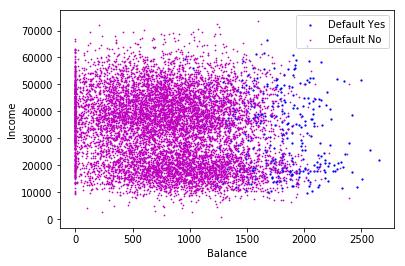

In [21]:
# Figura 4.1 Left

# separo los datos de balance e income de acuerdo a si hubo default o no
Bal_Y = []
In_Y = []
Bal_N = []
In_N = []

for i in range(Data.shape[0]):
    if ( Default[i] == 'Yes' ):
        Bal_Y.append(Balance[i])
        In_Y.append(Income[i])
    else: 
        Bal_N.append(Balance[i])
        In_N.append(Income[i])
        
plt.figure()
plt.scatter(Bal_Y, In_Y, s=5, c='b', label='Default Yes', linewidths=0)
plt.scatter(Bal_N, In_N, s=3, c='m',label='Default No', linewidths=0)
plt.xlabel('Balance')
plt.ylabel('Income')
plt.legend()

Text(0,0.5,'Income')

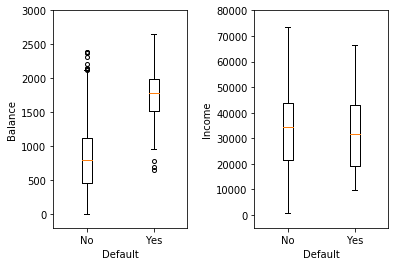

In [13]:
## Figura 4.1 Center and Right

plt.figure()
plt.subplots_adjust(wspace=0.5)

plt.subplot(121)
Bal = [Bal_N, Bal_Y] # Array de Balance cuando hubo default y cuando no
plt.boxplot(Bal, labels=['No', 'Yes'], flierprops=dict(marker='o', markersize=4, linestyle='none'))
plt.ylim(-200, 3000)
plt.xlabel('Default')
plt.ylabel('Balance')

plt.subplot(122)
In = [In_N, In_Y] # Array de Income cuando hubo default y cuando no
plt.boxplot(In, labels=['No', 'Yes'])
plt.ylim(-5000, 80000)
plt.xlabel('Default')
plt.ylabel('Income')


# Figura 4.2 (Panel derecho)

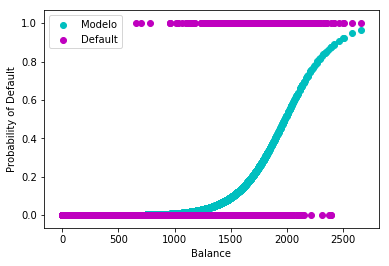

In [19]:
# Hago la prediccion usando regresion logistica 
logistic = sklearn.linear_model.LogisticRegression()

X = data['balance'].values.reshape(-1,1)
Y = data['default'].values.reshape(-1,1)

# Fiting del modelo
logistic.fit(X,Y)

# Prediccion de probabilidad
Y_predict_proba = logistic.predict_proba(X)

# Hago un array binario de default
Def_bin = []
for i in range(len(Default)):
    if ( Default[i] == 'Yes' ):
        Def_bin.append(1.0)
    else: 
        Def_bin.append(0.0)

plt.figure()
plt.scatter(X, Y_predict_proba[:,1], label='Modelo', linewidths=1, c='c') # curva de prediccion en [0,1]
plt.scatter(X, Def_bin, label='Default', linewidths=1, c='m') # default binario
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.legend()

# Figura 4.3

Text(0,0.5,'Credit Card Balance')

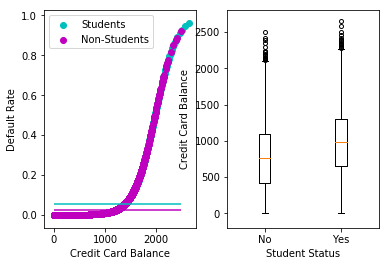

In [22]:
# separo los datos de balance de acuerdo a si es estudiante o no

Bal_Y = []
Bal_N = []

for i in range(Data.shape[0]):
    if ( Student[i] == 'Yes' ):
        Bal_Y.append(Balance[i])
    else: 
        Bal_N.append(Balance[i])

Bal_Y = np.array(Bal_Y).reshape(-1,1)
Bal_N = np.array(Bal_N).reshape(-1,1)

Y_predict_Bal_Y = logistic.predict_proba(Bal_Y)
Y_predict_Bal_N = logistic.predict_proba(Bal_N)

plt.figure()

plt.subplot(121)
plt.scatter(Bal_Y, Y_predict_Bal_Y[:,1], label='Students', c='c')
plt.hlines(np.mean(Y_predict_Bal_Y[:,1]), 0, 2500, linestyles='-', colors='c')
plt.scatter(Bal_N, Y_predict_Bal_N[:,1], label='Non-Students', c='m')
plt.hlines(np.mean(Y_predict_Bal_N[:,1]), 0, 2500, linestyles='-', colors='m')
plt.xlabel('Credit Card Balance')
plt.ylabel('Default Rate')
plt.legend()

plt.subplot(122)
Bal = [Bal_N, Bal_Y]
plt.boxplot(Bal, labels=['No', 'Yes'], flierprops=dict(marker='o', markersize=4, linestyle='none'))
plt.ylim(-200, 2800)
plt.xlabel('Student Status')
plt.ylabel('Credit Card Balance')

# Segunda Parte

Divida los datos anteriores en training y test. Calcule la matriz de confusión para esos dos conjuntos de datos. Diría que estos resultados son buenos para predecir Default?

Usando los siguientes datos: https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Smarket.html https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Smarket.csv

Dividida también los datos en training y test, en training van todos los datos hasta el año 2004, en test van los demás. Use la regresión logística para predecir Direction en función de las demás variables. Calcule la matriz de confusión para esos dos conjuntos de datos. Diría que estos resultados son buenos para predecir Direction?

In [23]:
# Divido los datos en train y test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

# Hago el fit logistico para train y predigo
logistic.fit(X_train, Y_train)
Y_predict = logistic.predict(X_train)

# Valores de verdad para train
V_p_train = 0
V_n_train = 0
F_p_train = 0
F_n_train = 0

for i in range(len(Y_predict)):
    if( Y_predict[i] == 'Yes' and Y_train[i] == 'Yes' ):
        V_p_train += 1
    elif( Y_predict[i] == 'No' and Y_train[i] == 'No' ):
        V_n_train += 1
    elif( Y_predict[i] == 'Yes' and Y_train[i] == 'No' ):
        F_p_train += 1 
    else: 
        F_n_train += 1 

Conf_train = np.matrix([[V_p_train, F_p_train], [F_n_train, V_n_train]])
print(Conf_train)

# Hago lo mismo para los datos de test

logistic.fit(X_test, Y_test)
Y_predict = logistic.predict(X_test)

V_p_test = 0
V_n_test = 0
F_p_test = 0
F_n_test = 0

for i in range(len(Y_predict)):
    if( Y_predict[i] == 'Yes' and Y_test[i] == 'Yes' ):
        V_p_test += 1
    elif( Y_predict[i] == 'No' and Y_test[i] == 'No' ):
        V_n_test += 1
    elif( Y_predict[i] == 'Yes' and Y_test[i] == 'No' ):
        F_p_test += 1 
    else: 
        F_n_test += 1 

Conf_test = np.matrix([[V_p_test, F_p_test], [F_n_test, V_n_test]])
print(Conf_test)

[[  40    7]
 [ 129 4824]]
[[  24   10]
 [ 140 4826]]


De acuerdo a las matrices de confusion viendo los valores de la diagnal que representan las predicciones acertadas del modelo, en particular el elemento matricial (1,1) que es muy grande a comparacion de los demas y teniendo en cuenta que hay mas No Default que Yes Default en los datos, se puede decir que este es un buen modelo

In [33]:
# Datos de Market
data = pd.read_csv('Smarket.csv')
Data = np.array(data)

In [34]:
Y = data['Direction'].values.reshape(-1,1)
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]

Year = data['Year']

# divido los datos en train y test

X_train = X[Year <= 2004]
Y_train = Y[Year <= 2004]

X_test = X[Year > 2004]
Y_test = Y[Year > 2004]

In [35]:
# Calculo las matrices de confusion de la misma manera que las calcule para los datos de Default
logistic.fit(X_train, Y_train)
Y_predict = logistic.predict(X_train)

V_p_train = 0
V_n_train = 0
F_p_train = 0
F_n_train = 0

for i in range(len(Y_predict)):
    if( Y_predict[i] == 'Up' and Y_train[i] == 'Up' ):
        V_p_train += 1
    elif( Y_predict[i] == 'Down' and Y_train[i] == 'Down' ):
        V_n_train += 1
    elif( Y_predict[i] == 'Up' and Y_train[i] == 'Down' ):
        F_p_train += 1 
    else: 
        F_n_train += 1 

Conf_train = np.matrix([[V_p_train, F_p_train], [F_n_train, V_n_train]])
print(Conf_train)

logistic.fit(X_test, Y_test)
Y_predict = logistic.predict(X_test)

V_p_test = 0
V_n_test = 0
F_p_test = 0
F_n_test = 0

for i in range(len(Y_predict)):
    if( Y_predict[i] == 'Up' and Y_test[i] == 'Up' ):
        V_p_test += 1
    elif( Y_predict[i] == 'Down' and Y_test[i] == 'Down' ):
        V_n_test += 1
    elif( Y_predict[i] == 'Up' and Y_test[i] == 'Down' ):
        F_p_test += 1 
    else: 
        F_n_test += 1 

Conf_test = np.matrix([[V_p_test, F_p_test], [F_n_test, V_n_test]])
print(Conf_test)

[[352 316]
 [155 175]]
[[126  89]
 [ 15  22]]


Ambas matrices de confusion tienen elementos matriciales en sus respectivas diagonales que no son significativamente mayores a los valores fuera de la diagonal, por lo tanto estos resultados no son buenos para predecir la direccion

In [60]:
# Uso la regresion logistica para predecir direction en funcion de las demas variables

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

Y_p = logistic.predict(X_test)
# Construyo array de los datos del mismo tamaño que Y_p y los elijo aleatoriamente de los datos originales
Y_data = np.random.choice(Y.flatten(), size=len(Y_p))

# Uso el metodo de la matriz de confusion para comparar las predicciones de direction con los valores reales

V_p = 0
V_n = 0
F_p = 0
F_n = 0

# Comparo elemento por elemento

for i in range(len(Y_p)):
    if( Y_p[i] == 'Up' and Y_data[i] == 'Up' ):
        V_p += 1
    elif( Y_p[i] == 'Down' and Y_data[i] == 'Down' ):
        V_n += 1
    elif( Y_p[i] == 'Up' and Y_data[i] == 'Down' ):
        F_p += 1 
    else: 
        F_n += 1 

Conf_test = np.matrix([[V_p, F_p], [F_n, V_n]])
print(Conf_test)

[[40 52]
 [76 84]]


De acuerdo a esta matriz de confusion, las predicciones no son tan buenas. Pues los elemtnos en la diagonal no son mucho mas grandes que los elementos fuera de la diagonal